## Real-time data example
In this example we try to read the most recent data from a "real time" dataset.  This becomes easy as we don't actually need to know the time of the last record (sort of like a "get latest").  We will be accessing the PERSIANN precipitation product from NOAA/NCEI.  Unfortunately, it doesn't look like this has been updated in a while.

In [1]:
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset, num2date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/ncFC/cdr/persiann-fc/PERSIANN:_aggregation_best.ncd'
data = Dataset(url)

In [3]:
# First get the dimensions
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]

# Now we get the variable, and we specific just the last one (the -1 index)
rain = data.variables['precipitation'][-1][:][:]

# Note here that for this particular data set, the lat/lon index is reversed from 
#  the "normal" order, so we simply transpose it.
rain = np.transpose(rain)

# Get actual date of last data point
time_convert = num2date(data.variables['time'][-1], data.variables['time'].units)
date = pd.to_datetime(time_convert)

/home/jimp/.conda/envs/OCN_463/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [4]:
# Here are just some examples of how you can print out useful information from 
#  netcdf files (in this case served via OPeNDAP)

# 1. print all the variables in the data set
print(data.variables.keys())

# 2. print the attributes of a single variable
print(data.variables['precipitation'].ncattrs())

# 3. print the actual attribute value of an attribute
print(data.variables['precipitation'].long_name)

dict_keys(['lat', 'lon', 'time', 'time_run', 'lon_bnds', 'lat_bnds', 'time_offset', 'precipitation'])
['units', 'long_name', 'missing_value', 'standard_name', 'valid_max', 'valid_min', 'cell_method', '_FillValue', '_ChunkSizes', 'coordinates']
NOAA Climate Data Record of PERSIANN-CDR daily precipitation


/home/jimp/.conda/envs/OCN_463/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'NOAA Climate Data Record of PERSIANN-CDR daily precipitation for 2019-09-30 00:00:00')

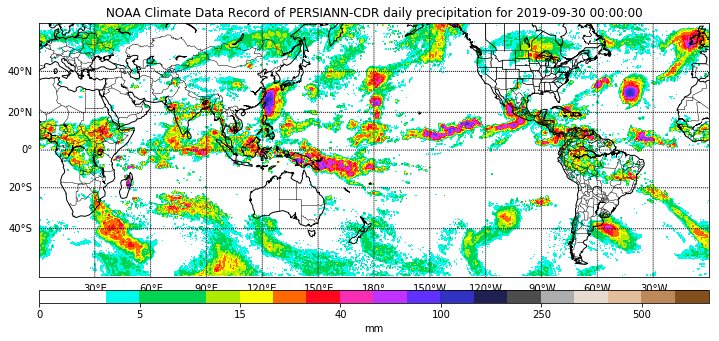

In [15]:
fig=plt.figure(figsize=(12, 8) )

# Miller projection:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

# convert the lat/lon values to x/y projections.
x, y = m(*np.meshgrid(lon,lat))

# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# draw parallels.
parallels = np.arange(-60.,60.,20.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)

# draw meridians
meridians = np.arange(0.,360.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,rain,clevs,cmap=cm.s3pcpn)

# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')

# add title
data_name = data.variables['precipitation'].long_name
plt.title( data_name + ' for ' + str(date) )